In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv('/content/drive/MyDrive/CodeAlpha Intern/Task 01 - Credit Scoring Model/Credit Risk Benchmark Dataset.csv')

# Display the first 5 rows of the DataFrame
display(df.head())

,rev_util,age,late_30_59,debt_ratio,monthly_inc,open_credit,late_90,real_estate,late_60_89,dependents,dlq_2yrs
0,0.006999,38.0,0.0,0.302150,5440.0,4.0,0.0,1.0,0.0,3.0,0
1,0.704592,63.0,0.0,0.471441,8000.0,9.0,0.0,1.0,0.0,0.0,0
2,0.063113,57.0,0.0,0.068586,5000.0,17.0,0.0,0.0,0.0,0.0,0
3,0.368397,68.0,0.0,0.296273,6250.0,16.0,0.0,2.0,0.0,0.0,0
4,1.000000,34.0,1.0,0.000000,3500.0,0.0,0.0,0.0,0.0,1.0,0


In [8]:
# All column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16714 entries, 0 to 16713
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rev_util     16714 non-null  float64
 1   age          16714 non-null  float64
 2   late_30_59   16714 non-null  float64
 3   debt_ratio   16714 non-null  float64
 4   monthly_inc  16714 non-null  float64
 5   open_credit  16714 non-null  float64
 6   late_90      16714 non-null  float64
 7   real_estate  16714 non-null  float64
 8   late_60_89   16714 non-null  float64
 9   dependents   16714 non-null  float64
 10  dlq_2yrs     16714 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 1.4 MB


In [9]:
# Checking if there any null values
df.isnull().sum()

,0
rev_util,0
age,0
late_30_59,0
debt_ratio,0
monthly_inc,0
open_credit,0
late_90,0
real_estate,0
late_60_89,0
dependents,0


In [11]:
y = df['dlq_2yrs']
X = df.drop('dlq_2yrs', axis=1)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (16714, 10)
Shape of y: (16714,)


**Reasoning**:
Now that the data is separated into features (X) and target (y), I will examine the statistical summary of X using `.describe()` to identify potential outliers, focusing on the specified numerical columns as per the instructions.



In [12]:
print("Statistical summary of features in X:\n")
display(X.describe())

Statistical summary of features in X:



,rev_util,age,late_30_59,debt_ratio,monthly_inc,open_credit,late_90,real_estate,late_60_89,dependents
count,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000
mean,4.799862,48.798672,1.110267,30.980298,6118.120258,8.503709,0.863827,1.047445,0.734354,0.944358
std,204.062345,13.906078,7.172890,719.694859,5931.841779,5.370965,7.167576,1.272565,7.138737,1.198791
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.082397,38.000000,0.000000,0.155971,3128.500000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.443080,48.000000,0.000000,0.322299,5000.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.926637,58.000000,1.000000,0.533426,7573.000000,11.000000,0.000000,2.000000,0.000000,2.000000
max,22000.000000,101.000000,98.000000,61106.500000,250000.000000,57.000000,98.000000,29.000000,98.000000,8.000000


**Reasoning**:
Based on the statistical summary, several features like `rev_util`, `monthly_inc`, `debt_ratio`, `late_30_59`, `late_90`, and `late_60_89` show significant differences between their 75th percentile and maximum values, indicating the presence of outliers. As instructed, I will now visualize the distributions of `rev_util`, `monthly_inc`, `dependents`, `debt_ratio`, `open_credit`, and `real_estate` using box plots to confirm and understand the extent of these outliers.



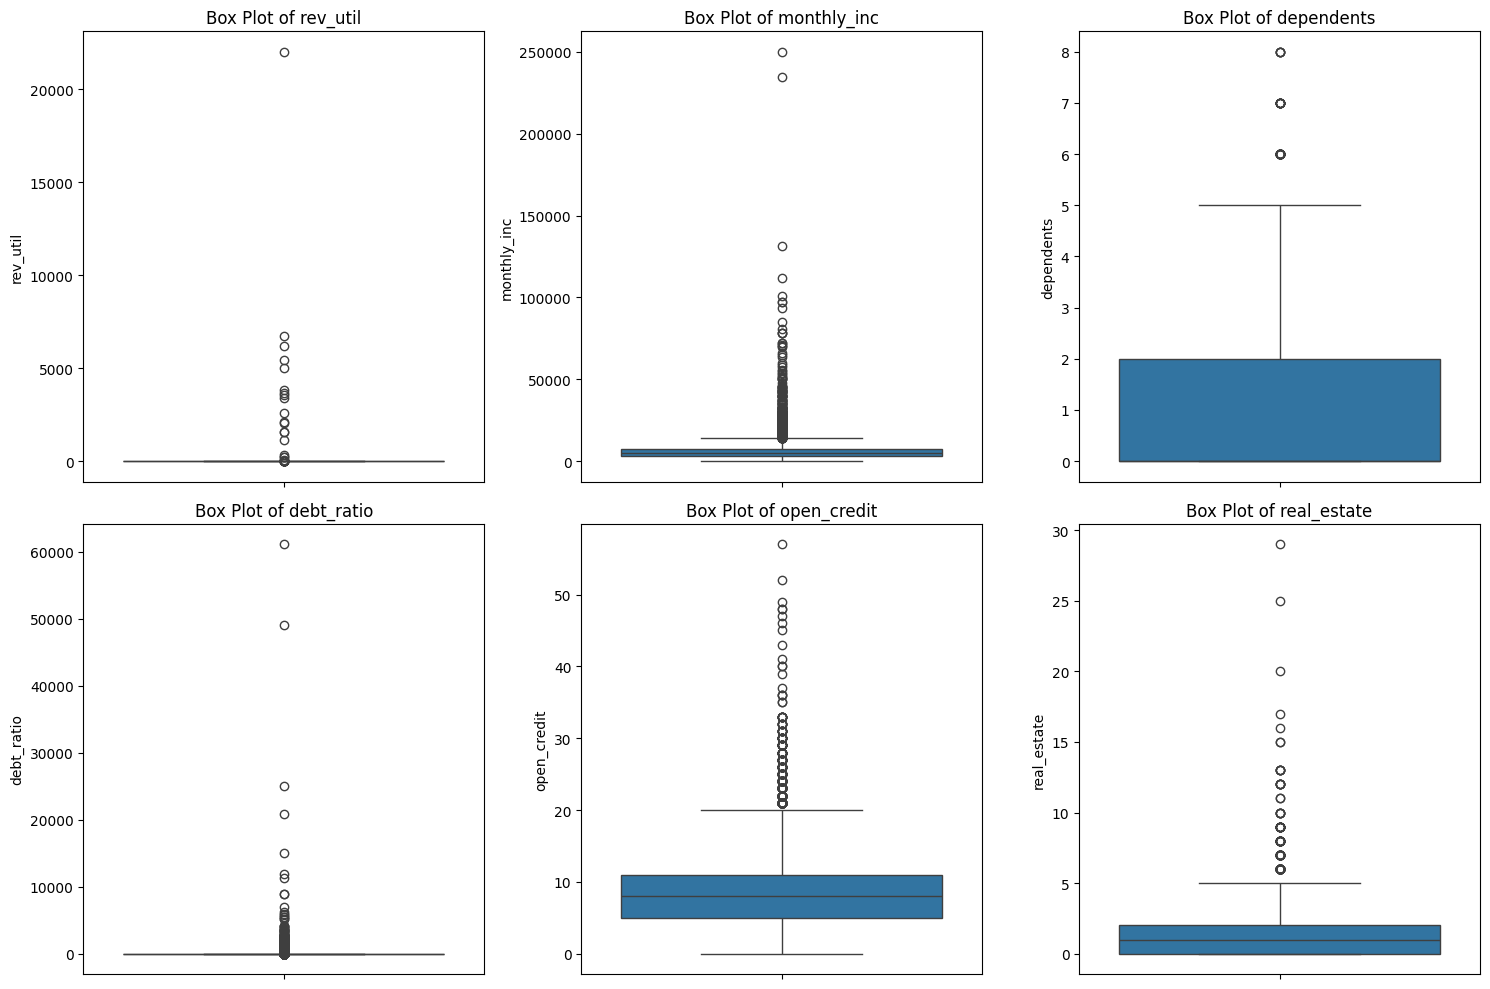

In [13]:
columns_to_plot = ['rev_util', 'monthly_inc', 'dependents', 'debt_ratio', 'open_credit', 'real_estate']

plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=X[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [14]:
columns_with_outliers = ['rev_util', 'monthly_inc', 'dependents', 'debt_ratio', 'open_credit', 'real_estate', 'late_30_59', 'late_90', 'late_60_89']

for col in columns_with_outliers:
    upper_bound = X[col].quantile(0.99)
    X[col] = np.where(X[col] > upper_bound, upper_bound, X[col])

print("Statistical summary of X after outlier capping:\n")
display(X.describe())

Statistical summary of X after outlier capping:



,rev_util,age,late_30_59,debt_ratio,monthly_inc,open_credit,late_90,real_estate,late_60_89,dependents
count,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000
mean,0.498760,48.798672,0.615771,4.522697,5942.747756,8.459016,0.365382,1.018487,0.230465,0.930657
std,0.406443,13.906078,1.160811,37.552722,4162.755175,5.182382,0.979830,1.096583,0.648295,1.152798
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.082397,38.000000,0.000000,0.155971,3128.500000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.443080,48.000000,0.000000,0.322299,5000.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.926637,58.000000,1.000000,0.533426,7573.000000,11.000000,0.000000,2.000000,0.000000,2.000000
max,1.447575,101.000000,6.000000,367.620000,24166.000000,25.000000,6.000000,5.000000,4.000000,4.000000


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Statistical summary of X after scaling:")
display(X_scaled_df.describe())

Statistical summary of X after scaling:


,rev_util,age,late_30_59,debt_ratio,monthly_inc,open_credit,late_90,real_estate,late_60_89,dependents
count,1.671400e+04,1.671400e+04,1.671400e+04,1.671400e+04,1.671400e+04,1.671400e+04,1.671400e+04,1.671400e+04,1.671400e+04,1.671400e+04
mean,-7.652129e-17,-1.428398e-16,2.890804e-17,-2.295639e-17,-5.739097e-17,6.196099e-17,-8.502366e-17,-8.534250e-17,8.842461e-17,-7.248267e-17
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-1.227171e+00,-1.999090e+00,-5.304821e-01,-1.204395e-01,-1.427642e+00,-1.632313e+00,-3.729148e-01,-9.288106e-01,-3.555054e-01,-8.073268e-01
25%,-1.024438e+00,-7.765665e-01,-5.304821e-01,-1.162860e-01,-6.760743e-01,-6.674768e-01,-3.729148e-01,-9.288106e-01,-3.555054e-01,-8.073268e-01
50%,-1.369963e-01,-5.743500e-02,-5.304821e-01,-1.118567e-01,-2.264788e-01,-8.857512e-02,-3.729148e-01,-1.685969e-02,-3.555054e-01,-8.073268e-01
75%,1.052767e+00,6.616965e-01,3.310101e-01,-1.062344e-01,3.916399e-01,4.903266e-01,-3.729148e-01,8.950913e-01,-3.555054e-01,9.276343e-01
max,2.334506e+00,3.753962e+00,4.638471e+00,9.669290e+00,4.377821e+00,3.191868e+00,5.750777e+00,3.630944e+00,5.814710e+00,2.662595e+00


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (13371, 10)
Shape of X_test: (3343, 10)
Shape of y_train: (13371,)
Shape of y_test: (3343,)


In [17]:
from sklearn.linear_model import LogisticRegression

# Instantiate the LogisticRegression model
model = LogisticRegression(random_state=42, solver='liblinear')

# Train the model using the training data
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


In [18]:
y_pred = model.predict(X_test)

print("Predictions on X_test generated successfully.")

Predictions on X_test generated successfully.


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Evaluation metrics imported successfully.")

Evaluation metrics imported successfully.


Accuracy: 0.7754
Precision: 0.7915
Recall: 0.7475
F1-Score: 0.7689


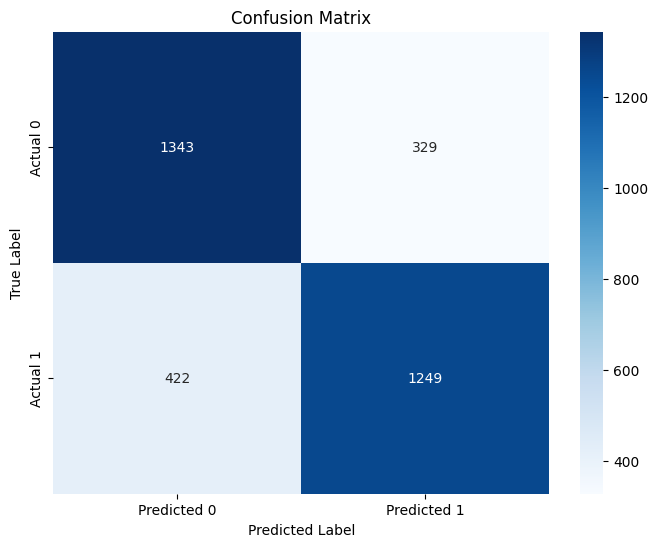

Model evaluation complete and confusion matrix visualized.


In [20]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Model evaluation complete and confusion matrix visualized.")

```markdown
# Credit Scoring Model: Video Presentation Script

## Introduction (0:00 - 0:30)

*   **Presenter:** "Hello everyone, and welcome to my presentation on developing a credit scoring model. Today, I'll walk you through the entire process, from understanding our data to building and evaluating a predictive model."
*   **Goal:** "Our primary goal is to predict an individual's creditworthiness using past financial data. Specifically, we're trying to predict if someone will experience a serious delinquency within two years, represented by the `dlq_2yrs` variable."

## 1. Data Loading and Initial Exploration (0:30 - 1:30)

*   **Presenter:** "The first step involved loading our dataset. We used pandas to read the CSV file, and a quick look at the first few rows and the `info()` method confirmed our data was loaded correctly, revealing 16,714 entries and 11 columns, with no missing values."
*   **Key takeaway:** "This initial check ensures data integrity and helps us understand the types of data we're dealing with."

## 2. Preparing Data for Modeling: Feature and Target Separation (1:30 - 2:00)

*   **Presenter:** "Next, we separated our data into features (X) and the target variable (y). The `dlq_2yrs` column became our target, while the remaining 10 columns formed our feature set."
*   **Code:** `y = df['dlq_2yrs']`, `X = df.drop('dlq_2yrs', axis=1)`
*   **Result:** "This resulted in an `X` DataFrame with 10 columns and `y` as a single Series, both ready for further processing."

## 3. Outlier Detection and Handling (2:00 - 3:30)

*   **Presenter:** "A crucial step in data preparation is handling outliers. We first examined the statistical summary of our features using `X.describe()`. This quickly highlighted several columns, such as `rev_util`, `monthly_inc`, and `debt_ratio`, where maximum values were significantly higher than their 75th percentiles, indicating potential outliers."
*   **Visualization:** "To confirm these, we visualized the distributions using box plots for key columns like `rev_util`, `monthly_inc`, `dependents`, `debt_ratio`, `open_credit`, and `real_estate`. The box plots clearly showed extreme values."
*   **Handling strategy:** "To mitigate their impact, we capped these outliers at the 99th percentile for nine identified columns. This approach limits extreme values without removing potentially valuable data points entirely."
*   **Code:** `for col in columns_with_outliers: upper_bound = X[col].quantile(0.99); X[col] = np.where(X[col] > upper_bound, upper_bound, X[col])`

## 4. Feature Scaling (3:30 - 4:15)

*   **Presenter:** "With outliers addressed, the next step was feature scaling. We used `StandardScaler` to transform our features so they have a mean of 0 and a standard deviation of 1."
*   **Why it's important:** "Scaling is essential for many machine learning algorithms, especially those that rely on distance calculations, as it prevents features with larger numerical ranges from disproportionately influencing the model."
*   **Code:** `scaler = StandardScaler(); X_scaled = scaler.fit_transform(X); X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)`

## 5. Splitting Data into Training and Test Sets (4:15 - 4:45)

*   **Presenter:** "To ensure robust model evaluation, we split our scaled data into training and testing sets. We allocated 80% for training and 20% for testing, using `train_test_split` with `random_state=42` for reproducibility and `stratify=y` to maintain the proportion of our target variable in both sets."
*   **Result:** "This gave us `X_train`, `X_test`, `y_train`, and `y_test`, with shapes confirming the split: `X_train` (13371, 10) and `X_test` (3343, 10)."

## 6. Training a Classification Model (4:45 - 5:30)

*   **Presenter:** "For our classification task, we chose Logistic Regression, a widely used and interpretable model for binary classification. We imported `LogisticRegression` from `sklearn.linear_model`."
*   **Model Instantiation:** "We instantiated the model with `random_state=42` for consistent results and `solver='liblinear'` which is good for small datasets and handles both L1 and L2 regularization."
*   **Training:** "The model was then trained using our prepared training data: `model.fit(X_train, y_train)`."

## 7. Evaluating Model Performance (5:30 - 7:00)

*   **Presenter:** "After training, we used the model to make predictions on the unseen test set: `y_pred = model.predict(X_test)`."
*   **Metrics:** "To evaluate the model's effectiveness, we calculated several key metrics: accuracy, precision, recall, and F1-score."
*   **Results:**
    *   **Accuracy:** 0.7754 (77.54% of predictions were correct).
    *   **Precision:** 0.7915 (When the model predicted a positive class, it was correct 79.15% of the time).
    *   **Recall:** 0.7475 (The model correctly identified 74.75% of all actual positive cases).
    *   **F1-Score:** 0.7689 (A balanced measure of precision and recall).
*   **Confusion Matrix:** "We also visualized the confusion matrix as a heatmap. This matrix shows:
    *   **True Positives (1249):** Correctly predicted as delinquent.
    *   **True Negatives (1343):** Correctly predicted as not delinquent.
    *   **False Positives (329):** Incorrectly predicted as delinquent (Type I error).
    *   **False Negatives (422):** Incorrectly predicted as not delinquent (Type II error).
    *   **Interpretation:** This gives us a clear picture of where the model is performing well and where it's making mistakes."

## 8. Summary and Next Steps (7:00 - 8:00)

*   **Presenter:** "In summary, our Logistic Regression model provides a moderate baseline for predicting creditworthiness, achieving an accuracy of 77.54%."
*   **Key Findings:**
    *   Data preprocessing included outlier capping at the 99th percentile and `StandardScaler` for feature normalization.
    *   The dataset was split into 80% training and 20% testing sets, maintaining target variable stratification.
    *   The model yielded a precision of 0.7915, recall of 0.7475, and an F1-score of 0.7689.
*   **Future Enhancements:** "To further improve this model, we could explore:
    *   **Alternative Models:** Experiment with more advanced algorithms like Random Forests, Gradient Boosting, or Support Vector Machines.
    *   **Hyperparameter Tuning:** Optimize the current model's parameters using techniques like GridSearchCV or RandomizedSearchCV.
    *   **Feature Engineering:** Create new features from existing ones to potentially capture more complex relationships within the data."

*   **Presenter:** "Thank you for your time. I hope this presentation provided a clear overview of the credit scoring model development process."
```